<a href="https://colab.research.google.com/github/SANKOJUKEERTHI/demo-repo/blob/main/FinalDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING ALL THE LIBRARIES


In [2]:
!pip install -U -q PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
warnings.filterwarnings('ignore')
#warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
import statsmodels.api as sm
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NAMING THE COLUMNS AND IMPORTING THE DATASET

In [4]:
#https://drive.google.com/file/d/1_i6tvZqG65EdZiYH_PE5GD6vVUubM446/view?usp=sharing
#fileDownloaded = drive.CreateFile({'id':'1_i6tvZqG65EdZiYH_PE5GD6vVUubM446'})
#fileDownloaded.GetContentFile('train (1).txt.gz')
columns = ['#10th Min','Min','Sensor 1','Sensor 2','Sensor 3','Sensor 4','Sensor 5','Sensor 6','Sensor 7','Sensor 8','Sensor 9',
              'Sensor 10','Sensor 11','Sensor 12','Sensor 13','Sensor 14','Sensor 15','Sensor 16','Sensor 17','Sensor 18','Sensor 19','Sensor 20',
              'Sensor 21','Sensor 22','Sensor 23','Sensor 24','Sensor 25']
df = pd.read_csv('/content/drive/MyDrive/train (1).txt.gz', sep=',',names = columns)
df

,#10th Min,Min,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,...,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25
0,0,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549995,49999,7.0,0.2817,0.6392,0.9709,0.5667,0.0822,0.9976,0.7358,0.9617,...,0.9600,0.4254,0.7402,0.2611,0.8659,0.7473,0.1093,0.3094,0.7807,0.7287
549996,49999,8.0,0.5622,0.7094,0.1205,0.7765,0.5579,0.4585,0.0583,0.1459,...,0.7685,0.7410,0.9113,0.3729,0.1165,0.0866,0.2817,0.4906,0.7756,0.5428
549997,49999,9.0,0.3565,0.4717,0.6521,0.6147,0.2524,0.3296,0.1769,0.9617,...,0.5341,0.8423,0.5090,0.8436,0.9809,0.2696,0.5609,0.6706,0.1297,0.8826
549998,49999,10.0,0.7871,0.2163,0.1643,0.2265,0.9406,0.6559,0.5830,0.4123,...,0.2767,0.0436,0.8426,0.2371,0.6578,0.0270,0.7201,0.4489,0.4848,0.5125


VISUALISATION PART

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from statsmodels.tsa.arima_model import ARIMA

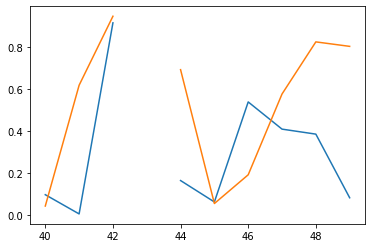

In [6]:
#df = df.drop(['#10th Min','Min'],axis=1)
plt.plot(df[40:50]['Sensor 20'])
plt.plot(df[40:50]['Sensor 24'])

In [7]:
len(df)
df.describe()

,#10th Min,Min,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,...,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25
count,550000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,22726.956349,5.500000,0.499646,0.500296,0.499995,0.500033,0.500318,0.500491,0.499761,0.499674,...,0.500060,0.500664,0.500395,0.500221,0.500455,0.499851,0.500049,0.499837,0.500127,0.500587
std,15525.428308,2.872284,0.288652,0.288496,0.288808,0.288599,0.288603,0.288693,0.288808,0.288567,...,0.288754,0.288270,0.288906,0.288865,0.288643,0.288304,0.288654,0.288483,0.288675,0.288442
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8749.750000,3.000000,0.249900,0.250800,0.249400,0.250400,0.250900,0.250700,0.249700,0.249600,...,0.250300,0.251800,0.250000,0.249900,0.250600,0.250100,0.249800,0.250500,0.250400,0.251000
50%,22499.500000,5.500000,0.499600,0.499700,0.500400,0.500500,0.500100,0.500600,0.499600,0.499500,...,0.499750,0.500500,0.500600,0.500900,0.500300,0.500200,0.500100,0.499000,0.500300,0.501100
75%,36249.250000,8.000000,0.749400,0.750300,0.749925,0.749600,0.749800,0.750600,0.749900,0.749600,...,0.750500,0.750300,0.750900,0.750300,0.750500,0.749400,0.749800,0.749400,0.750400,0.750000
max,49999.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
columns = ['#10th Min','Min','Sensor 1','Sensor 2','Sensor 3','Sensor 4','Sensor 5','Sensor 6','Sensor 7','Sensor 8','Sensor 9',
              'Sensor 10','Sensor 11','Sensor 12','Sensor 13','Sensor 14','Sensor 15','Sensor 16','Sensor 17','Sensor 18','Sensor 19','Sensor 20',
              'Sensor 21','Sensor 22','Sensor 23','Sensor 24','Sensor 25']
df = pd.read_csv('/content/drive/MyDrive/train (1).txt.gz', sep=',',names = columns)
len(df)
df.describe()

,#10th Min,Min,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,...,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22,Sensor 23,Sensor 24,Sensor 25
count,550000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,22726.956349,5.500000,0.499646,0.500296,0.499995,0.500033,0.500318,0.500491,0.499761,0.499674,...,0.500060,0.500664,0.500395,0.500221,0.500455,0.499851,0.500049,0.499837,0.500127,0.500587
std,15525.428308,2.872284,0.288652,0.288496,0.288808,0.288599,0.288603,0.288693,0.288808,0.288567,...,0.288754,0.288270,0.288906,0.288865,0.288643,0.288304,0.288654,0.288483,0.288675,0.288442
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8749.750000,3.000000,0.249900,0.250800,0.249400,0.250400,0.250900,0.250700,0.249700,0.249600,...,0.250300,0.251800,0.250000,0.249900,0.250600,0.250100,0.249800,0.250500,0.250400,0.251000
50%,22499.500000,5.500000,0.499600,0.499700,0.500400,0.500500,0.500100,0.500600,0.499600,0.499500,...,0.499750,0.500500,0.500600,0.500900,0.500300,0.500200,0.500100,0.499000,0.500300,0.501100
75%,36249.250000,8.000000,0.749400,0.750300,0.749925,0.749600,0.749800,0.750600,0.749900,0.749600,...,0.750500,0.750300,0.750900,0.750300,0.750500,0.749400,0.749800,0.749400,0.750400,0.750000
max,49999.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


FORMATING THE LABELS(OUTPUT DATA)

In [10]:
y = pd.DataFrame(columns = columns)
for i in range (50000):
  y.loc[i] = df.loc[i*11+10]
y = y['#10th Min']

In [10]:
df = df.dropna(subset=['Min'])
df = df.reset_index(drop=True)
#df.isnull().sum()


finding correlation between parameters

In [11]:
df_corr = df.corr()
plt.figure(figsize=(20, 20),dpi=600)
g=sns.heatmap(df_corr, square=True,
            center=0, annot=True, linewidths=.5,
            cmap="RdBu_r", cbar_kws={"shrink": 0.8},vmin=-1,vmax=1);
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=8,ha='right')
#plt.title('Correlation Matrix')
#sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns)

[Text(0.5, 0, '#10th Min'),
 Text(1.5, 0, 'Min'),
 Text(2.5, 0, 'Sensor 1'),
 Text(3.5, 0, 'Sensor 2'),
 Text(4.5, 0, 'Sensor 3'),
 Text(5.5, 0, 'Sensor 4'),
 Text(6.5, 0, 'Sensor 5'),
 Text(7.5, 0, 'Sensor 6'),
 Text(8.5, 0, 'Sensor 7'),
 Text(9.5, 0, 'Sensor 8'),
 Text(10.5, 0, 'Sensor 9'),
 Text(11.5, 0, 'Sensor 10'),
 Text(12.5, 0, 'Sensor 11'),
 Text(13.5, 0, 'Sensor 12'),
 Text(14.5, 0, 'Sensor 13'),
 Text(15.5, 0, 'Sensor 14'),
 Text(16.5, 0, 'Sensor 15'),
 Text(17.5, 0, 'Sensor 16'),
 Text(18.5, 0, 'Sensor 17'),
 Text(19.5, 0, 'Sensor 18'),
 Text(20.5, 0, 'Sensor 19'),
 Text(21.5, 0, 'Sensor 20'),
 Text(22.5, 0, 'Sensor 21'),
 Text(23.5, 0, 'Sensor 22'),
 Text(24.5, 0, 'Sensor 23'),
 Text(25.5, 0, 'Sensor 24'),
 Text(26.5, 0, 'Sensor 25')]

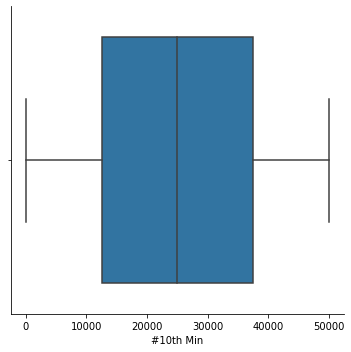

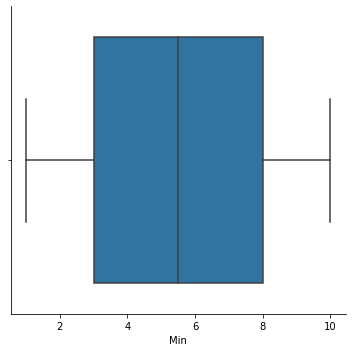

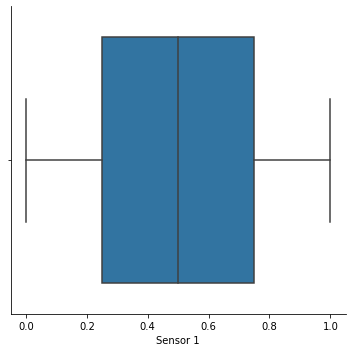

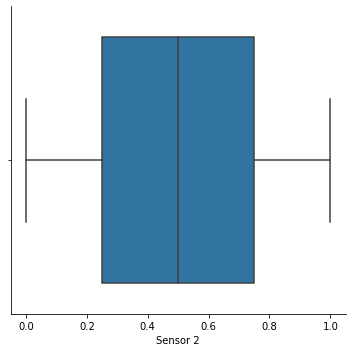

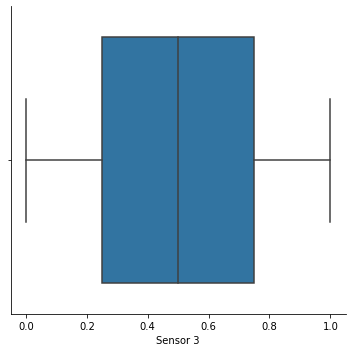

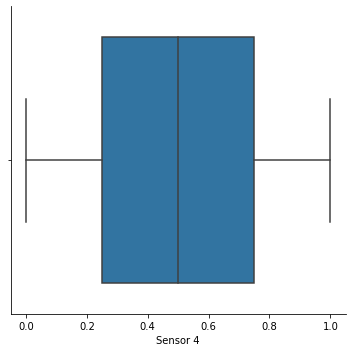

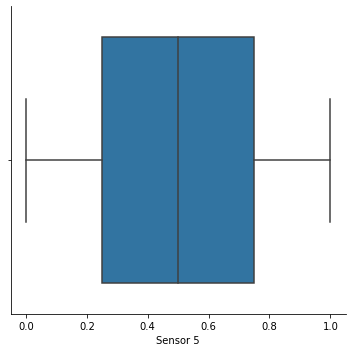

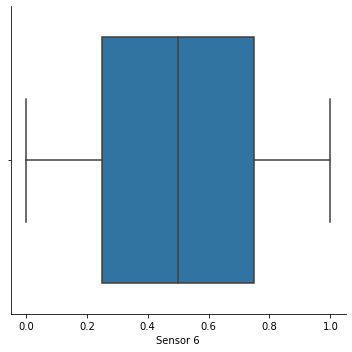

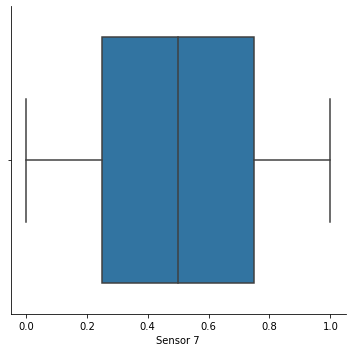

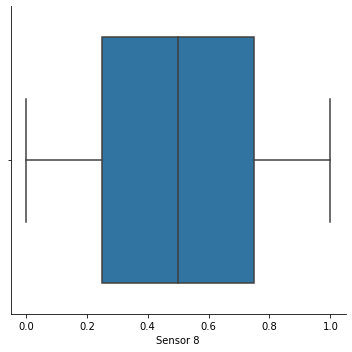

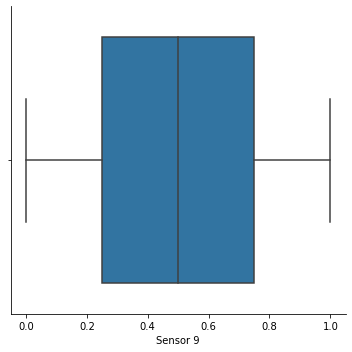

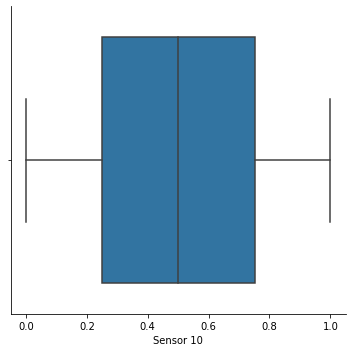

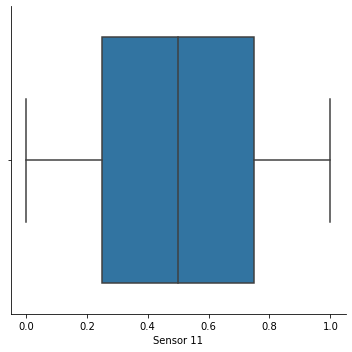

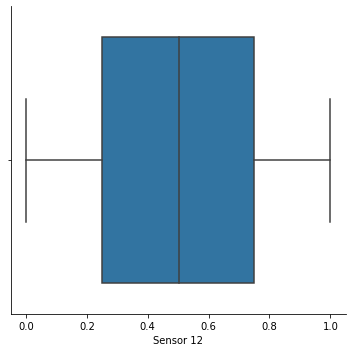

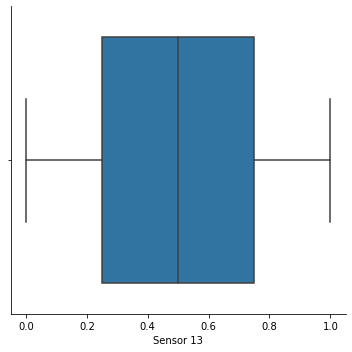

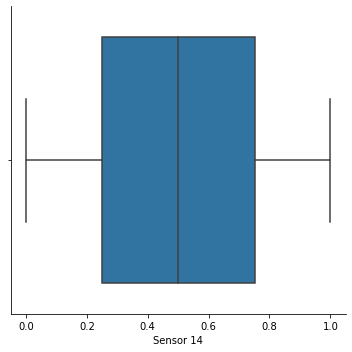

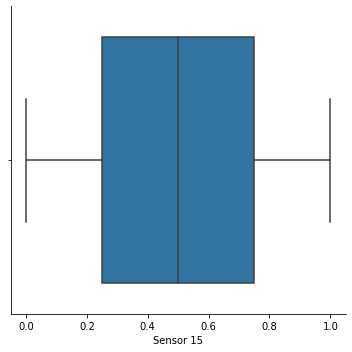

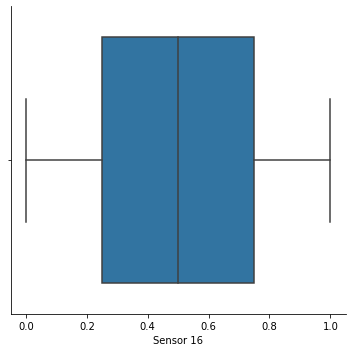

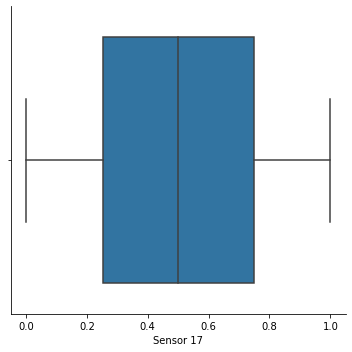

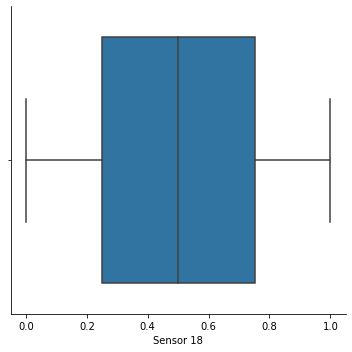

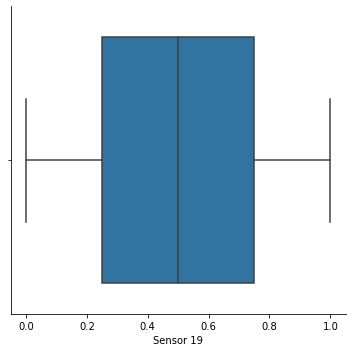

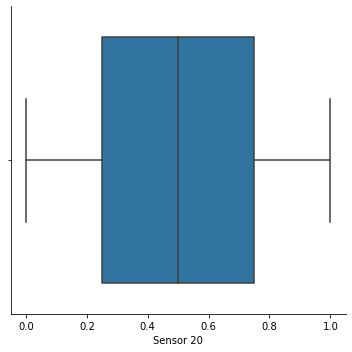

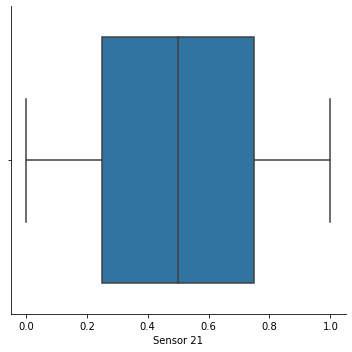

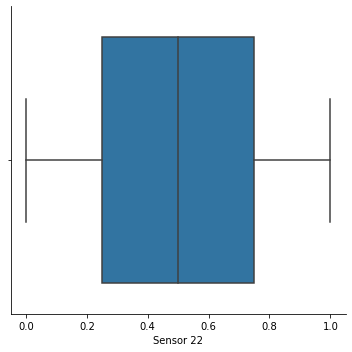

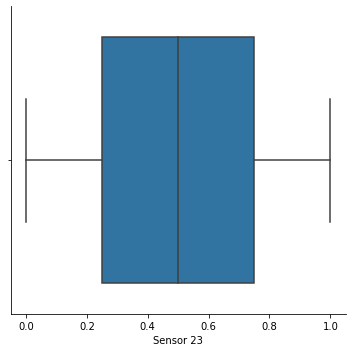

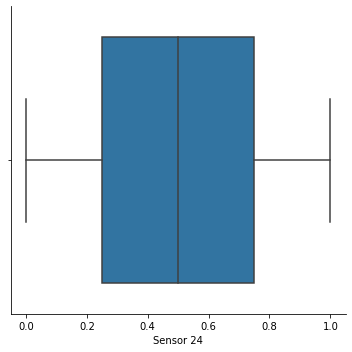

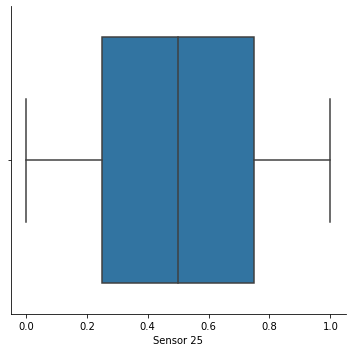

In [12]:
for k in columns:
  sns.catplot(x=k, kind = 'box',data = df)

#sns.catplot(x='Sensor 1', kind = 'box',data = df)

FORMATING THE INPUT PARAMETERS, USING MEAN AND VARIANCE

In [16]:
df_mean = pd.DataFrame(columns = columns)
for i in range (50000):
  df_mean.loc[i] = df[i*10:i*10+10].mean()

In [17]:
df_mean = pd.DataFrame(columns = columns)
for i in range (50000):
  df_mean.loc[i] = df[i*10:i*10+10].var()

In [18]:
df_mean = df_mean.drop(['#10th Min','Min'],axis=1)

FINDING MEAN RELATION

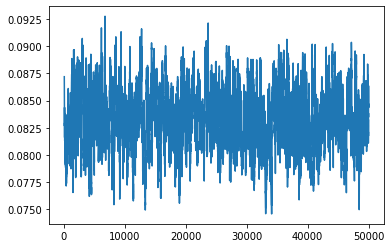

In [31]:
#rolling mean 
df_rollmean = pd.DataFrame(columns)
df_rollmean = df_mean.rolling(window = 100).mean()
df_rollmean
df_rollmean.loc[99]
df_rollmean.loc[100]
df_rollmean.loc[101]
plt.plot(df_rollmean['Sensor 1'])
#df_rollmean.dropna(inplace=True)

In [66]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


FINDING THE OPTIMAL FEATURES USING RECURSSIVE ELEMINATION METHOD

In [19]:
#recurssive feature elimination
from sklearn.datasets import make_classification

df_mean, y = make_classification(
    n_samples=50000,
    n_features=25,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

In [35]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=25,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
   
)
rfecv.fit(df_mean, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 25


As the method above gave the optimal number of features as 25, we are going to use all the sensors data and train the model

Veryfing the above result using graph

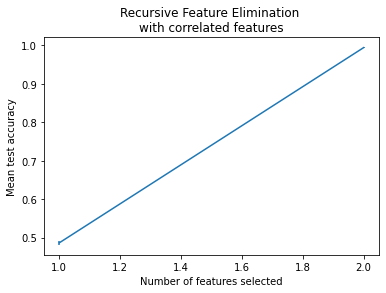

In [21]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

Spliting the data into training and validation data

In [38]:
x_train, x_validation, y_train, y_validation = train_test_split(df_mean, y, test_size = 0.25,random_state=42)


model training

TRAINING THE MODEL USING 

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# multivariate classification

# Split dataset into training and testing sets


# Create Decision Tree classifier with max_depth of 3
clf = DecisionTreeClassifier(max_depth=3)

# Train model on training set
clf.fit(x_train, y_train)

# Make predictions on test set
y_pred = clf.predict(x_validation)

# Calculate accuracy of model
accuracy = accuracy_score(y_validation, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.98


RNN-Recurrent Neural Networks

NOW IMPORTING THE TEST DATA AND FORMATING IT

In [26]:
final = pd.read_csv('/content/drive/MyDrive/test.txt')
final.head()

,50000,1,0.3786,0.7031,0.0734,0.0492,0.8328,0.9048,0.7850,0.9979,...,0.6897,0.9130,0.5681,0.0129,0.4369,0.5533,0.2384,0.4805,0.3959,0.4756
0,50000,2.0,0.0871,0.3716,0.1444,0.4848,0.8051,0.6569,0.8121,0.5083,...,0.6067,0.1750,0.3267,0.1499,0.4746,0.2572,0.7884,0.3364,0.8252,0.8013
1,50000,3.0,0.7733,0.3273,0.0397,0.2026,0.7231,0.4640,0.2385,0.0435,...,0.2943,0.5956,0.4769,0.8894,0.8833,0.0786,0.4448,0.0071,0.4052,0.5436
2,50000,4.0,0.4817,0.6624,0.3319,0.7669,0.4364,0.1332,0.4890,0.7637,...,0.4996,0.2766,0.4083,0.9838,0.5823,0.3014,0.2781,0.1267,0.7782,0.1162
3,50000,5.0,0.0100,0.8568,0.5611,0.0171,0.2108,0.1046,0.4475,0.8220,...,0.2412,0.4066,0.2261,0.1200,0.8346,0.3691,0.5683,0.1112,0.7261,0.5521
4,50000,6.0,0.6423,0.9762,0.7789,0.7177,0.7033,0.8952,0.7277,0.5088,...,0.2017,0.7490,0.4136,0.8026,0.7199,0.0539,0.0439,0.0753,0.2288,0.1638


In [27]:
final_mean = pd.DataFrame(columns = columns)
for i in range (1000):
  final_mean.loc[i] = final[i*10:i*10+10].mean()
final_mean = pd.DataFrame(columns = columns)
for i in range (1000):
  final_mean.loc[i] = df[i*10:i*10+10].var()
final_mean = final_mean.drop(['#10th Min','Min'],axis=1)

In [41]:
final_mean.head()
pred = clf.predict(final_mean)

predicting the final values

In [42]:
import csv

# Define the data to be written to the CSV file

# Define the name of the CSV file
filename = 'model_output.csv'

# Open the CSV file in write mode
with open(filename, mode='w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the data to the CSV file
    writer.writerow(pred)

# Print a confirmation message
print(f"The model output has been written to {filename}")



The model output has been written to model_output.csv
